In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="//fonts.googleapis.com/css?family=Quicksand:300" />
<link rel="stylesheet" type="text/css" href="custom.css">

# Building Neural Network

**Goal**
- Create baseline with full connected neural network

** Data ** 

Like many other libraries, `keras` includes some standard datasets to play around with.
The follow a specific [API](https://www.tensorflow.org/programmers_guide/datasets) that make them iteract nicely with TensorFlow. 
- MNIST
- IMDB Reviews

### Classifying handwritten digits: a categorical classification example
 The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

** Let's first create a base line with `Dense Layers` **

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras import utils

import random

/home/jimmy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 6

In [11]:
def plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [13]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# the train data shapes (size) in Numpy 
print("train_images original shape", train_images.shape)
print("train_labels original shape", train_labels.shape)

# the test data shapes (size) in Numpy 
print("test_images original shape", test_images.shape)
print("test_labels original shape", test_labels.shape)

train_images original shape (60000, 28, 28)
train_labels original shape (60000,)
test_images original shape (10000, 28, 28)
test_labels original shape (10000,)


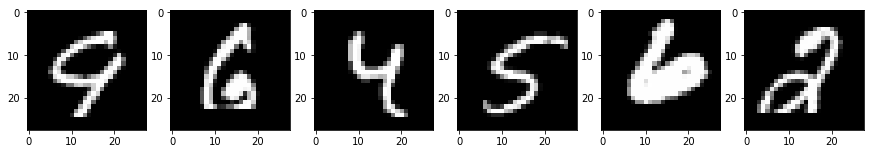

In [217]:
[ax.imshow(random.choice(train_images), cmap='gray') for ax in plt.subplots(1, 6)[1]];

In [218]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
print("Training matrix shape", train_images.shape)
print("Testing matrix shape", test_images.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


In [219]:
train_labels = utils.to_categorical(train_labels, nb_classes)
test_labels = utils.to_categorical(test_labels, nb_classes)

In [220]:
test_images, test_labels

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
![alt text](https://github.com/wxs/keras-mnist-tutorial/raw/8824b7b56963a92ef879f09acd99cf3a210db2b8/figure.png)

In [221]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0. 
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [222]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [223]:
train_images.shape

(60000, 28, 28)

When compiling a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical crossentropy, and is a loss function well-suited to comparing two probability distributions.

In [224]:
history = model.fit(
    train_images, train_labels, 
    batch_size=128, epochs=8, 
    validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/8
42000/42000 [==============================] - 2s 57us/step - loss: 8.9642 - acc: 0.4411 - val_loss: 8.1462 - val_acc: 0.4934
Epoch 2/8
42000/42000 [==============================] - 2s 38us/step - loss: 7.7405 - acc: 0.5189 - val_loss: 7.5828 - val_acc: 0.5289
Epoch 3/8
42000/42000 [==============================] - 2s 38us/step - loss: 7.7687 - acc: 0.5174 - val_loss: 7.5373 - val_acc: 0.5322
Epoch 4/8
42000/42000 [==============================] - 2s 39us/step - loss: 7.6626 - acc: 0.5242 - val_loss: 7.2039 - val_acc: 0.5528
Epoch 5/8
42000/42000 [==============================] - 2s 38us/step - loss: 7.6306 - acc: 0.5263 - val_loss: 8.5616 - val_acc: 0.4684
Epoch 6/8
42000/42000 [==============================] - 2s 38us/step - loss: 7.5598 - acc: 0.5307 - val_loss: 8.2412 - val_acc: 0.4884
Epoch 7/8
42000/42000 [==============================] - 2s 38us/step - loss: 7.6362 - acc: 0.5261 - val_loss: 8.1528 - val_acc: 0.493

Categorical Cross Entropy Prediction: 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
Model Prediction:  [6]
Ground-truth:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


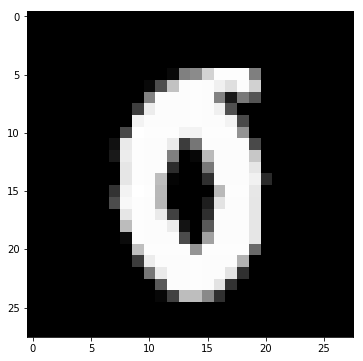

In [225]:
import random
i = random.randint(1, 1000)
random_image = test_images[i]
plt.imshow(test_images[i], cmap='gray')
print('Categorical Cross Entropy Prediction: \n', [round(i, 1) for i in model.predict(random_image.reshape(1,28,28))[0]])
print('Model Prediction: ', model.predict_classes(random_image.reshape(1,28,28)))
print('Ground-truth: ', test_labels[i])

In [226]:
test_loss, test_acc =  model.evaluate(X_test, Y_test, verbose=3)
print('Test score loss:', test_loss)
print('Test accuracy:', test_acc)

Test score loss: 7.6862965698242185
Test accuracy: 0.4867


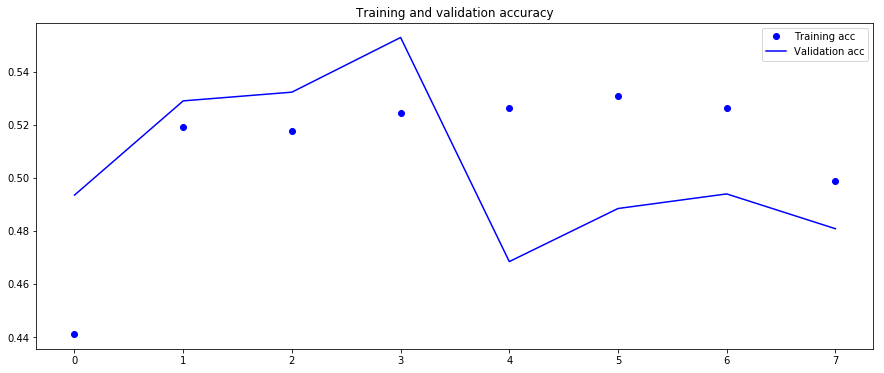

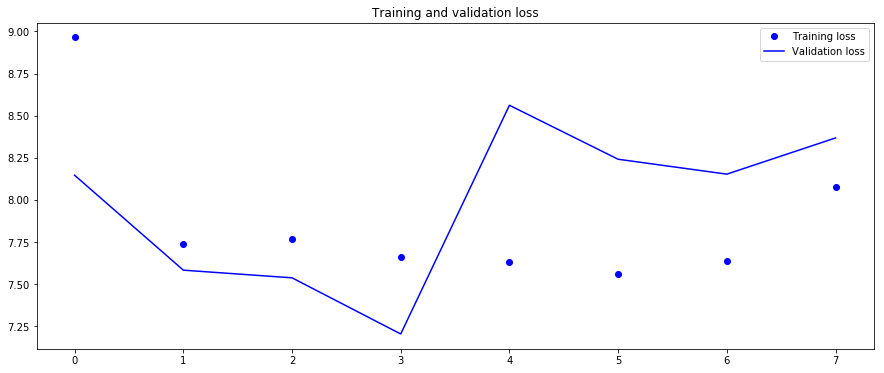

In [227]:
plot(history)

# [Next: basics NN with Keras.ipynb](03_02_basics_of_keras_NN.ipynb)